In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

# laptop config:
# source code location
src = "/media/sergiu/lappie/data/work/andersson/src/src"
# crispr file generated by crass (xml format)
crispr_location = "/media/sergiu/lappie/data/work/andersson/src/data/lmo_full/LMO_full_crass.crispr"
# tab separated output
crispr_tab_location = "/media/sergiu/lappie/data/work/andersson/src/data/lmo_full/LMO_full_spacer_table_filtered.txt"


if not src in sys.path:
    sys.path.append(src)
else:
    print(sys.path)

import crass_crispr_parser as crispr

In [8]:
samples_str = '120813_R1 P4201_117_R1 121123_R1 P4201_123_R1 P4201_120_R1 P4201_109_R1 P4201_111_R1 120322_R1 120604_R1 120924_R1 121022_R1 P4201_107_R1 120516_R1 121220_R1 P4201_114_R1 120920_R1 P4201_122_R1 120423_R1 121001_R1 P4201_105_R1 120507_R1 120328_R1 120717_R1 P4201_108_R1 120314_R1 120802_R1 121015_R1 P4201_118_R1 120403_R1 121128_R1 120705_R1 120903_R1 120419_R1 120823_R1 120613_R1 120820_R1 P4201_104_R1 P4201_103_R1 120628_R1 P4201_101_R1 120709_R1 P4201_119_R1 P4201_110_R1 P4201_121_R1 P4201_124_R1 120416_R1 120521_R1 120806_R1 120619_R1 P4201_102_R1 121004_R1 P4201_106_R1 P4201_116_R1 121105_R1 P4201_112_R1 120531_R1 121028_R1 120828_R1 120910_R1 120813_R2 P4201_117_R2 121123_R2 P4201_123_R2 P4201_120_R2 P4201_109_R2 P4201_111_R2 120322_R2 120604_R2 120924_R2 121022_R2 P4201_107_R2 120516_R2 121220_R2 P4201_114_R2 120920_R2 P4201_122_R2 120423_R2 121001_R2 P4201_105_R2 120507_R2 120328_R2 120717_R2 P4201_108_R2 120314_R2 120802_R2 121015_R2 P4201_118_R2 120403_R2 121128_R2 120705_R2 120903_R2 120419_R2 120823_R2 120613_R2 120820_R2 P4201_104_R2 P4201_103_R2 120628_R2 P4201_101_R2 120709_R2 P4201_119_R2 P4201_110_R2 P4201_121_R2 P4201_124_R2 120416_R2 120521_R2 120806_R2 120619_R2 P4201_102_R2 121004_R2 P4201_106_R2 P4201_116_R2 121105_R2 P4201_112_R2 120531_R2 121028_R2 120828_R2 120910_R2'
sample_list = samples_str.split()
# the values are already time ordered
#time_order = samples
print(sample_list)
time_order = set([t[:-3] for t in sample_list])

['120813_R1', 'P4201_117_R1', '121123_R1', 'P4201_123_R1', 'P4201_120_R1', 'P4201_109_R1', 'P4201_111_R1', '120322_R1', '120604_R1', '120924_R1', '121022_R1', 'P4201_107_R1', '120516_R1', '121220_R1', 'P4201_114_R1', '120920_R1', 'P4201_122_R1', '120423_R1', '121001_R1', 'P4201_105_R1', '120507_R1', '120328_R1', '120717_R1', 'P4201_108_R1', '120314_R1', '120802_R1', '121015_R1', 'P4201_118_R1', '120403_R1', '121128_R1', '120705_R1', '120903_R1', '120419_R1', '120823_R1', '120613_R1', '120820_R1', 'P4201_104_R1', 'P4201_103_R1', '120628_R1', 'P4201_101_R1', '120709_R1', 'P4201_119_R1', 'P4201_110_R1', 'P4201_121_R1', 'P4201_124_R1', '120416_R1', '120521_R1', '120806_R1', '120619_R1', 'P4201_102_R1', '121004_R1', 'P4201_106_R1', 'P4201_116_R1', '121105_R1', 'P4201_112_R1', '120531_R1', '121028_R1', '120828_R1', '120910_R1', '120813_R2', 'P4201_117_R2', '121123_R2', 'P4201_123_R2', 'P4201_120_R2', 'P4201_109_R2', 'P4201_111_R2', '120322_R2', '120604_R2', '120924_R2', '121022_R2', 'P4201_1

# Time order

For LMO 2012, there should be a file called "crispr_sample_info.csv" somewhere on Rackham. I only have the Asko, Transect and LMO 2013+ data.

`$ cd /proj/uppstore2017124/b2010008_nobackup/ && find . -name "crispr_sample_info.csv"`


## Generate the CRISPR table

This step was sourced.

In [3]:
doc = crispr.import_crass_crispr(crispr_location)
groups, spacers, sources, spcont = crispr.extract_info_all(doc)

# filter single spacers
spacers = crispr.filter_single_spacers(spacers, spcont)
# filter spacers sharing their first(last) n nuccleotides with each other (inside a cluster)
spacers = crispr.filter_similar_spacers(spacers, nnuc=9)
# filter spacers sharing their first(last) n nuccleotides with their DR
spacers = crispr.fiter_DR_shared_spacers(spacers, groups, nnuc=9)

crispr.write_table(crispr_tab_location, sample_list, groups, spacers, sources)


Done!

Spacer count before single spacer removal: 15479
Spacer count after single spacer removal: 6895

Spacer count before similar spacer removal: 6895
Spacer count after similar spacer removal: 6617

Spacer count before DR-shared spacer removal: 6617
Spacer count after DR-shared spacer removal: 6265
Wrote data to: /media/sergiu/lappie/data/work/andersson/src/data/lmo_full/LMO_full_spacer_table_filtered.txt


In [4]:
df = pd.read_csv(crispr_tab_location, sep="\t")
df.head()

,CRISPRid,DRseq,SPid,SPseq,120813_R1,P4201_117_R1,121123_R1,P4201_123_R1,P4201_120_R1,P4201_109_R1,...,P4201_102_R2,121004_R2,P4201_106_R2,P4201_116_R2,121105_R2,P4201_112_R2,120531_R2,121028_R2,120828_R2,120910_R2
0,G183,CTCTTGGGCCTCTCTTGGCTCATCTTGGGGC,SP26,CTCTCCTGGGCCTCTTTTGGGCCT,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,G183,CTCTTGGGCCTCTCTTGGCTCATCTTGGGGC,SP60,CCGCGTCGAGACGAGAGCGTC,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,G271,GTTGTGATTGGCTTTCAAATCGTATATTAGCACAAC,SP432,AAATAGTGCGTATAATTGCACTTTGAGTAT,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,G271,GTTGTGATTGGCTTTCAAATCGTATATTAGCACAAC,SP437,CCAAAGCAGTACGGACATTTCGGAGCTGCC,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,G271,GTTGTGATTGGCTTTCAAATCGTATATTAGCACAAC,SP451,TTTCAATTTGAATTTATACCACAAAAAGAT,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


How the spacer repertoire looks for a CRISPR, line "vision":

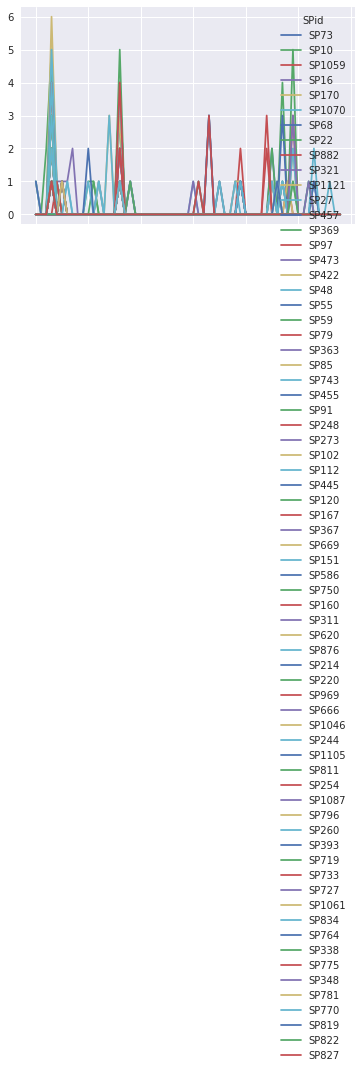

In [15]:
#G1802887
def group_df(id):
    gdf = df[df["CRISPRid"]==id]
    gdf = gdf.drop([df.columns[i] for i in [0,1,3]], axis = 1)
    gdf = gdf.set_index('SPid')
    gdf = gdf[[t+"_R1" for t in time_order]]
    gdf = gdf.transpose()
    return gdf

gdf = group_df("G1505146")
gdf.plot(legend=True)

How the spacer repertoire looks for a CRISPR, table "vision":

In [16]:
gdf = group_df("G1505146")
gdf.head()

SPid,SP73,SP10,SP1059,SP16,SP170,SP1070,SP68,SP22,SP882,SP321,...,SP834,SP764,SP338,SP775,SP348,SP781,SP770,SP819,SP822,SP827
P4201_110_R1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
P4201_105_R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120613_R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P4201_109_R1,2,5,0,4,3,0,3,4,0,0,...,2,1,0,1,1,1,3,1,1,1
120619_R1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# H-index (Hirsch index)

This index was adapted by Anders from the research publishing industry. A CRISPR (author) has index h if h of N spacers (papers) have at least h sample occurences (citations) each, and the other N − h spacers (papers) have no more than h sample occurences (citations) each.

Trying now to figure out a Hirsch index function:

In [12]:
crisprs = set(df["CRISPRid"].values)
hindexes = {}
for crispr in crisprs:
    #h = N
    gdf = group_df(crispr)
    spacers = set(gdf.columns.values)
    occ = [gdf[gdf[spacer]>0].shape[0] for spacer in spacers]
    h = sum(x >= i + 1 for i, x in enumerate(sorted(occ, reverse=True)))
    hindexes[crispr]=h

/media/sergiu/lappie/programs/miniconda3/envs/andersson/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


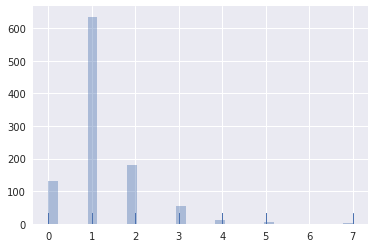

In [13]:
x = list(hindexes.values())
sns.distplot(x, kde=False, rug=True);

In [18]:
[crispr for crispr in hindexes if hindexes[crispr]>4]

['G1535704', 'G13506', 'G1505146', 'G15890', 'G2486969']

# Spacer profiles

This is ordered by sample collection time. Two examples, the only crisprs that had 5 h-index.

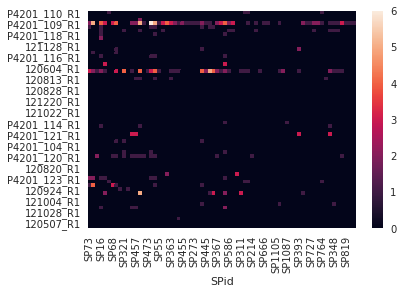

In [17]:
gdf = group_df('G1505146')

sns.heatmap(gdf)

# How many of the spacers are shared with the LMO 2013.2014 data?

My expectation is that DRs that occur only on one sample subset would be filtered out, and the global clustering performed on spacers might filter out a number of spacers as well. This could be done better via a proper alignment, but I will just match quick and dirty for now. 

So I do this by instaling a lib called fuzzywuzzy, usefule for general string matching.

`conda install -c conda-forge fuzzywuzzy`

In [6]:
import pandas as pd

lmo1314_file = "/media/sergiu/lappie/data/work/andersson/data/lmo2013_2014/lmo2013_2014_spacer_table_filtered_all.bkup.txt"
lmo_full_file = "/media/sergiu/lappie/data/work/andersson/data/lmo_full/LMO_full_spacer_table_filtered.txt"

lmo13 = pd.read_csv(lmo1314_file, sep="\t")
lmofull = pd.read_csv(lmo_full_file, sep="\t")


In [7]:
lmo13_set = set(lmo13["DRseq"].values)
lmofull_set = set(lmofull["DRseq"].values)

jacc = len(lmo13_set & lmofull_set)/float(len(lmo13_set | lmofull_set))
print(jacc)

0.06600153491941672


In [4]:
from fuzzywuzzy import fuzz
matched = set()
for s in lmofull_set:
    for s2 in lmo13_set:
        if fuzz.ratio(s, s2)>80:
            matched.add(s)
            break

In [8]:
len(matched)/float(len(lmo13_set | lmofull_set))

0.15528268099258122